<a href="https://colab.research.google.com/github/krushabh-dev/House-Price-Prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_california_housing


In [3]:
dataset = fetch_california_housing()

In [4]:
feature_names = dataset['feature_names']

In [5]:
print("Feature names: {}\n".format(feature_names))

Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']



In [6]:
print(dataset.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [7]:
print(dataset.data.shape)

(20640, 8)


In [8]:
df = pd.DataFrame(data = dataset.data, columns= dataset.feature_names )
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures

In [10]:
data_original = (dataset.data)

In [11]:
X_scaled = preprocessing.scale(dataset.data)

In [12]:
pft = PolynomialFeatures(degree = 3)
X_poly = pft.fit_transform(X_scaled)

In [13]:
label_prices = dataset['target']
feature_names = dataset['feature_names']

In [14]:
print("Prices for the houses: {}\n".format(label_prices))

Prices for the houses: [4.526 3.585 3.521 ... 0.923 0.847 0.894]



In [15]:
print("Feature names: {}\n".format(feature_names))

Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']



In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_dummy, y_train, y_dummy = train_test_split(X_poly, dataset.target, test_size = 0.40, random_state = 42)
X_CV,X_test,y_CV,y_test = train_test_split(X_dummy, y_dummy, test_size = 0.2, random_state = 42)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, dataset.target,test_size = 0.40,random_state = 42)

In [20]:
from sklearn import linear_model
model = linear_model.Ridge(alpha = 300)
print(model)

Ridge(alpha=300, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)


In [21]:
model.fit(X_train, y_train)

Ridge(alpha=300, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [22]:
predictionCV = model.predict(X_CV)

In [23]:
predictionTestSet = model.predict(X_test)

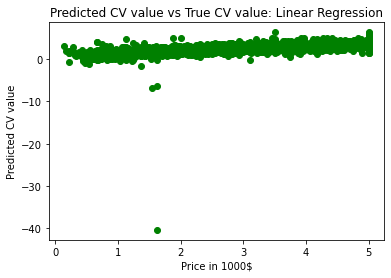

In [25]:
plt.scatter(y_CV, predictionCV, c = 'green')
plt.xlabel("Price in 1000$")
plt.ylabel("Predicted CV value")
plt.title("Predicted CV value vs True CV value: Linear Regression")
plt.show()

In [26]:
print("Predicted Value[60] from test set: {}\n".format(predictionTestSet[60]))

Predicted Value[60] from test set: 2.56401028613216



In [27]:
print("Original Value[60] form test set: {}\n".format(y_test[60]))

Original Value[60] form test set: 5.00001



In [28]:
print("Prediction in CV: {}\n".format(predictionCV))
print("Original Values of CV: {}\n".format(y_CV))

Prediction in CV: [2.09574618 2.58114891 1.22239022 ... 1.16767211 1.97862364 0.90194505]

Original Values of CV: [2.459 3.5   0.723 ... 1.157 3.746 0.762]



In [29]:
from sklearn.metrics import mean_squared_error
errorTestSet = mean_squared_error(y_test, predictionTestSet)
print(errorTestSet)

0.8569350875699687


In [30]:
errorCV = mean_squared_error(y_CV, predictionCV)
errorTestSet = mean_squared_error(y_test, predictionTestSet)

In [31]:
print("Error in cross-validation set: {:.2f}\n".format(errorCV))

Error in cross-validation set: 0.73



In [32]:
print("Predicted value for test set: {}\n".format(predictionTestSet))
print("Original value for test set: {}\n".format(y_test))

print("Error in test set: {:.2f}\n".format(errorTestSet))

Predicted value for test set: [1.05866035 1.58282546 3.35462593 ... 0.85309575 1.31697815 1.64802355]

Original value for test set: [0.477   0.458   5.00001 ... 0.982   2.156   0.98   ]

Error in test set: 0.86

